# Hotel Booking

En este notebook básicamente realizo algo de EDA con feature engineering para dejar listo el dataset para el modelo.

## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400">Sobre el dataset</p>

>[Fue sacado de este dataset de kaggle](https://www.kaggle.com/datasets/mojtaba142/hotel-booking)

*(Esto lo comencé gracias a un curso de código facilito y me gustó su descripción y diccionario de datos, así que los voy a usar)*<br>
Hotel Facilito se está preparando para las vacaciones de verano, sin embargo, les preocupa que muchos de sus clientes cancelan de ultima hora, dejándoles con habitaciones vacías – sucede que algunos clientes simplemente no se presentan y, a pesar de que a veces se cobra una cuota de reservación, la gran mayoría de las ganancias se obtiene cuando los huéspedes pagan el resto al ocupar la habitación.

Usando sus datos, les gustaría que les ayudaras a identificar a aquellos clientes que tienen más posibilidad de cancelar ya que les gustaría darles seguimiento para que si en caso de que requieran cancelar, se haga con la mayor antelación posible.

 - `hotel`: Hotel en el que se hizo la reserva.
  - `is_canceled`: Indica si la reserva fue cancelada o no.
  - `lead_time`: Número de días que transcurrieron entre la fecha de ingreso de la reserva en el PMS y la fecha de llegada.
  - `arrival_date_year`: Año de la fecha de llegada.
  - `arrival_date_month`: Mes de la fecha de llegada con 12 categorías: "Enero" a "Diciembre".
  - `arrival_date_week_number`: Número de semana de la fecha de llegada.
  - `arrival_date_day_of_month`: Día del mes de la fecha de llegada.
  - `stays_in_weekend_nights`: Número de noches de fin de semana (sábado o domingo) que el huésped se quedó o reservó para quedarse en el hotel.
  - `stays_in_week_nights`: Número de noches de semana (lunes a viernes) que el huésped se quedó o reservó para quedarse en el hotel.
  - `adults`: Número de adultos.
  - `children`: Número de niños.
  - `babies`: Número de bebés.
  - `meal`: Tipo de comida reservada. Valor categórico.
  - `country`: País de origen. Las categorías se representan según ISO 3155–3:2013.
  - `market_segment`: Designación del segmento de mercado.
  - `distribution_channel`: Canal de distribución de la reserva.
  - `is_repeated_guest`: Valor que indica si el nombre de la reserva era de un huésped recurrente (1) o no (0).
  - `previous_cancellations`: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
  - `previous_bookings_not_canceled`: Número de reservas anteriores que no fueron canceladas por el cliente antes de la reserva actual.
  - `reserved_room_type`: Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.
  - `assigned_room_type`: Código del tipo de habitación asignada a la reserva. A veces, el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones operativas del hotel (por ejemplo, sobreventa) o por solicitud del cliente. El código se presenta en lugar de la designación por razones de anonimato.
  - `booking_changes`: Número de cambios/modificaciones realizados a la reserva desde el momento en que se ingresó en el PMS hasta el momento del check-in o la cancelación.
  - `deposit_type`: Indicación de si el cliente hizo un depósito para garantizar la reserva.
  - `agent`: ID de la agencia de viajes que realizó la reserva.
  - `company`: ID de la empresa/entidad que realizó la reserva o es responsable de pagar la reserva.
  - `days_in_waiting_list`: Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
  - `customer_type`: Tipo de reserva.
  - `adr`: Tarifa diaria promedio.
  - `required_car_parking_spaces`: Número de espacios de estacionamiento requeridos por el cliente.
  - `total_of_special_requests`: Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).
  - `reservation_status`: Último estado de la reserva.
  - `reservation_status_date`: Fecha en que se estableció el último estado.
  - `name`: Nombre del cliente.
  - `email`: Correo electrónico del cliente.
  - `phone`: Teléfono del cliente.
  - `credit_card`: Últimos cuatro dígitos de la tarjeta de crédito del cliente.

## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400"> EDA / Feature Engineering </p>

In [14]:
import pandas as pd

df = pd.read_csv("data/hotel_bookings_training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119190 entries, 0 to 119189
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119190 non-null  object 
 1   is_canceled                     119190 non-null  int64  
 2   lead_time                       119190 non-null  int64  
 3   arrival_date_year               119190 non-null  int64  
 4   arrival_date_month              119190 non-null  object 
 5   arrival_date_week_number        119190 non-null  int64  
 6   arrival_date_day_of_month       119190 non-null  int64  
 7   stays_in_weekend_nights         119190 non-null  int64  
 8   stays_in_week_nights            119190 non-null  int64  
 9   adults                          119190 non-null  int64  
 10  children                        119186 non-null  float64
 11  babies                          119190 non-null  int64  
 12  meal            

In [15]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
110797,City Hotel,1,77,2015,November,47,16,1,4,2,...,Contract,72.25,0,2,Canceled,2015-09-28,Kevin Clark,Clark.Kevin22@aol.com,812-288-7805,************9794
101478,City Hotel,0,18,2016,January,3,15,2,3,2,...,Transient-Party,89.00,0,1,Check-Out,2016-01-20,Dennis Stewart,Stewart_Dennis@hotmail.com,683-327-5458,************2026
112928,City Hotel,1,300,2015,August,33,13,0,2,2,...,Transient-Party,62.80,0,0,Canceled,2014-10-17,Benjamin Medina,BenjaminMedina45@xfinity.com,708-228-9851,************4331
43890,City Hotel,0,214,2016,September,39,23,1,2,2,...,Transient,80.75,0,1,Check-Out,2016-09-26,David Mccall,David.Mccall@xfinity.com,118-353-3808,************1950
49967,City Hotel,0,29,2015,October,44,27,0,3,2,...,Group,75.00,0,0,Check-Out,2015-10-30,Kent Powell,Powell.Kent@aol.com,845-353-7121,************7843


Los datos personales deben ser eliminados además que no creo que propocionen mucha información

In [16]:
df = df.drop(columns=['phone-number','name','email','credit_card'], axis=1)

Cambio el formato de object a datetime

In [17]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='%Y-%m-%d')

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Missing values </p>

Lo hago de esta manera para verlo a nivel "porcentaje"

In [18]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

company                           94.304891
agent                             13.688229
country                            0.408591
children                           0.003356
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

Voy a llenar `children`, elimino `company` porque estaba todo nulo, y elimino el resto de valores faltantes, son muy pocos

In [19]:
df['children'] = df['children'].fillna(0)

In [20]:
df = df.drop(columns=['company'],axis=1)

In [21]:
df = df.dropna(axis=0)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Duplicated rows </p>

In [22]:
df.duplicated().sum()

27749

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Outliers </p>

In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721.000000,102721
mean,0.390319,111.748854,2016.156813,27.338305,15.788398,0.978300,2.589879,1.900069,0.111146,0.007700,0.014038,0.077277,0.024386,0.201711,86.530807,2.613779,104.673672,0.052998,0.605514,2016-07-29 03:15:45.306217728
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,2017-02-12 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487824,107.689074,0.706170,13.280308,8.794944,1.003987,1.905846,0.490875,0.411787,0.097121,0.117648,0.758779,0.436103,0.624357,110.705087,18.767105,50.022627,0.225244,0.799403,NaN


<Axes: xlabel='adr'>

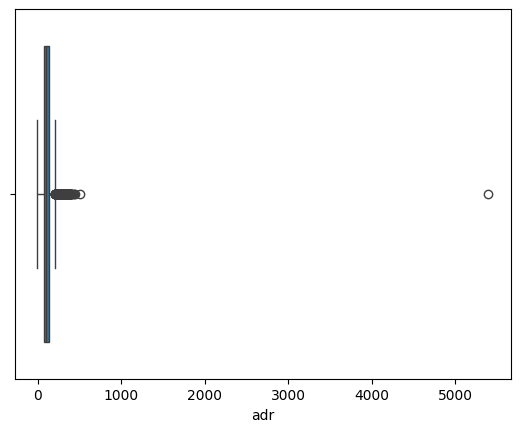

In [24]:
import seaborn as sns

sns.boxplot(x=df['adr'])

In [25]:
df = df[(df['adr']>=0) & (df['adr']<1000)]

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Datos categóricos / Encoding </p>

In [26]:
df_copy = df.copy()

In [27]:
cat_cols = df_copy.select_dtypes(exclude=['number']).columns
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [28]:
for _ in cat_cols:
    print('=='*10)
    print(df_copy[_].value_counts())

hotel
City Hotel      71064
Resort Hotel    31655
Name: count, dtype: int64
arrival_date_month
August       12655
July         11581
May          10063
June          9785
April         9730
October       9423
September     9398
March         8115
February      6438
December      5611
November      5379
January       4541
Name: count, dtype: int64
meal
BB           77512
HB           13393
SC           10315
Undefined      830
FB             669
Name: count, dtype: int64
country
PRT    37528
GBR    10874
FRA     9797
ESP     7831
DEU     6984
       ...  
VGB        1
PYF        1
SLE        1
NPL        1
MRT        1
Name: count, Length: 174, dtype: int64
market_segment
Online TA        55973
Offline TA/TO    23724
Groups           15632
Direct            6571
Corporate          691
Complementary      103
Aviation            25
Name: count, dtype: int64
distribution_channel
TA/TO        94414
Direct        6989
Corporate     1123
GDS            191
Undefined        2
Name: count, dtyp

`reservation_status`,`agent`,`distribution_channel`,`reserved_room_type` no la pongo porque se correlacionan bastante (esto lo fui viendo primero con esas variables y el heatmap, y fui borrando y mirando)

In [29]:
encoder = pd.get_dummies(df_copy[['hotel','arrival_date_month','meal','market_segment','assigned_room_type','deposit_type','customer_type']])*1

df_copy = pd.concat([df_copy, encoder], axis=1)

df_copy = df_copy.drop(columns=['reservation_status_date','country','hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','agent','distribution_channel','reserved_room_type'], axis=1)

In [30]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))
# sns.heatmap(df_copy.corr(), annot=False,  cmap='coolwarm', fmt='.2f',linecolor='black',linewidths=0.01)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Binarizer </p>

In [31]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()

El binarizer me coloca 1 y 0, si el valor es 0 quedará 0, si es mayor o igual a 1, pues será 1

In [32]:
df_copy['previous_cancellations'] = binarizer.fit_transform(df_copy[['previous_cancellations']])
df_copy['previous_bookings_not_canceled'] = binarizer.fit_transform(df_copy[['previous_bookings_not_canceled']])
df_copy['booking_changes'] = binarizer.fit_transform(df_copy[['booking_changes']])
df_copy['required_car_parking_spaces'] = binarizer.fit_transform(df_copy[['required_car_parking_spaces']])
df_copy['total_of_special_requests'] = binarizer.fit_transform(df_copy[['total_of_special_requests']])

In [33]:
df_copy.shape

(102719, 61)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Train test split </p>

In [34]:
X = df_copy.drop(['is_canceled'], axis=1)
y = df_copy['is_canceled']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42,stratify=y_rest)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (61631, 60)
Tamaño del conjunto de validación: (20544, 60)
Tamaño del conjunto de prueba: (20544, 60)


## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400"> Machine learning </p>

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Model </p>

In [36]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier

# study = optuna.create_study(direction="maximize")

# def objective(trial):
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
#     max_depth = trial.suggest_int("max_depth", 2, 10)
#     n_stimators = trial.suggest_int("n_estimators", 10, 100)
    
#     model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, n_estimators=n_stimators,random_state=10)
    
#     model.fit(X_train, y_train)
    
#     return model.score(X_val, y_val)

# study.optimize(objective, n_trials=100)
# print(f'Best parameters: {study.best_params}')
# print(f'Best score: {study.best_value}')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

rfc = RandomForestClassifier(n_estimators=99,random_state=10, criterion='entropy',max_depth=10)
rfc.fit(X_train, y_train)

pred_y = rfc.predict(X_val)
print(rfc.score(X_train,y_train),accuracy_score(y_val, pred_y), recall_score(y_val, pred_y))

0.8068017718356022 0.8049065420560748 0.578625763810949


### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Model testing </p>

In [39]:
data_train_x = pd.concat([X_train, X_val])
data_train_y = pd.concat([y_train, y_val])

In [40]:
rfc = RandomForestClassifier(n_estimators=99,random_state=10, criterion='entropy',max_depth=10)
rfc.fit(data_train_x, data_train_y)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=99,
                       random_state=10)

In [41]:
from sklearn.metrics import accuracy_score, recall_score

test_pred_y = rfc.predict(X_test)
print(accuracy_score(test_pred_y, y_test), recall_score(test_pred_y, y_test))

0.8040790498442367 0.876627051499717


Guardaré el dataset limpio, antes de hacer el encoding.

In [42]:
ruta = 'data/hotel_booking_clean.csv'
df.to_csv(ruta)

Encoding variables = `['hotel','arrival_date_month','meal','market_segment','assigned_room_type','deposit_type','customer_type']`<br>
Encoding delete variables = `['reservation_status_date','country','hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','agent','distribution_channel','reserved_room_type']`
Binarizer variables = `['previous_cancellations','previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','total_of_special_requests']`

In [43]:
df_columns = df.columns
used_columns = ['reservation_status_date','country','hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','agent','distribution_channel','reserved_room_type','previous_cancellations','previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','total_of_special_requests']
passthrough_columns = [i for i in df_columns if i not in used_columns]

passthrough_columns

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'days_in_waiting_list',
 'adr']